# Exploratory Data Analysis

This notebook examines the raw data extracted by tagging the training/validation demo files.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
# load in raw csv files
dtypes = {
    'roundWinner': 'object',
    'aliveCt': np.uint8,
    'aliveT': np.uint8,
    'meanHealthCt': np.float64,
    'meanHealthT': np.float64,
    'meanValueCt': np.float64,
    'meanValueT': np.float64,
    'roundTime': np.float64,
    'bombTime': np.float64,
    'bombDefusing': np.bool_,
    'bombDefused': np.bool_
}
converters = {
    'roundWinner': lambda v: 'CT' if int(v) == 0 else 'T'
}

train_df = pd.read_csv('./train.csv', dtype=dtypes, converters=converters)
val_df = pd.read_csv('./val.csv', dtype=dtypes, converters=converters)
all_df = pd.concat([train_df, val_df])

## Raw Data Summaries

### Overall Summary

In [3]:
display(all_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))))

,aliveCt,aliveT,meanHealthCt,meanHealthT,meanValueCT,meanValueT,roundTime,bombTime
count,1.84327e+06,1.84327e+06,1.84327e+06,1.84327e+06,1.84327e+06,1.84327e+06,1.84327e+06,1.84327e+06
mean,3.96205,3.78225,88.8236,82.9018,4743.24,4170.43,47.9298,2.16689
std,1.24591,1.3663,16.4997,21.6513,1932.61,1661.76,32.2601,6.84768
min,0,0,0,0,0,0,0,0
25%,3,3,83,74.75,3940,3700,19.6797,0
50%,4,4,95.75,90,5510,4825,43.0234,0
75%,5,5,100,100,6170,5310,72.5,0
max,5,5,100,100,8250,7750,156.008,41.0625


### Round Winner Distribution

Looking for bias in the target column.

In [4]:
display(pd.DataFrame(all_df['roundWinner'].value_counts()))

,roundWinner
CT,953648
T,889618


## Feature Relationships

A pairwise plot of all features against each other, showing combined trends. Individual plot points are coloured blue if they represent a CT round win, and orange for a T round win.

Plots are generated from a small sample of the overall dataset.

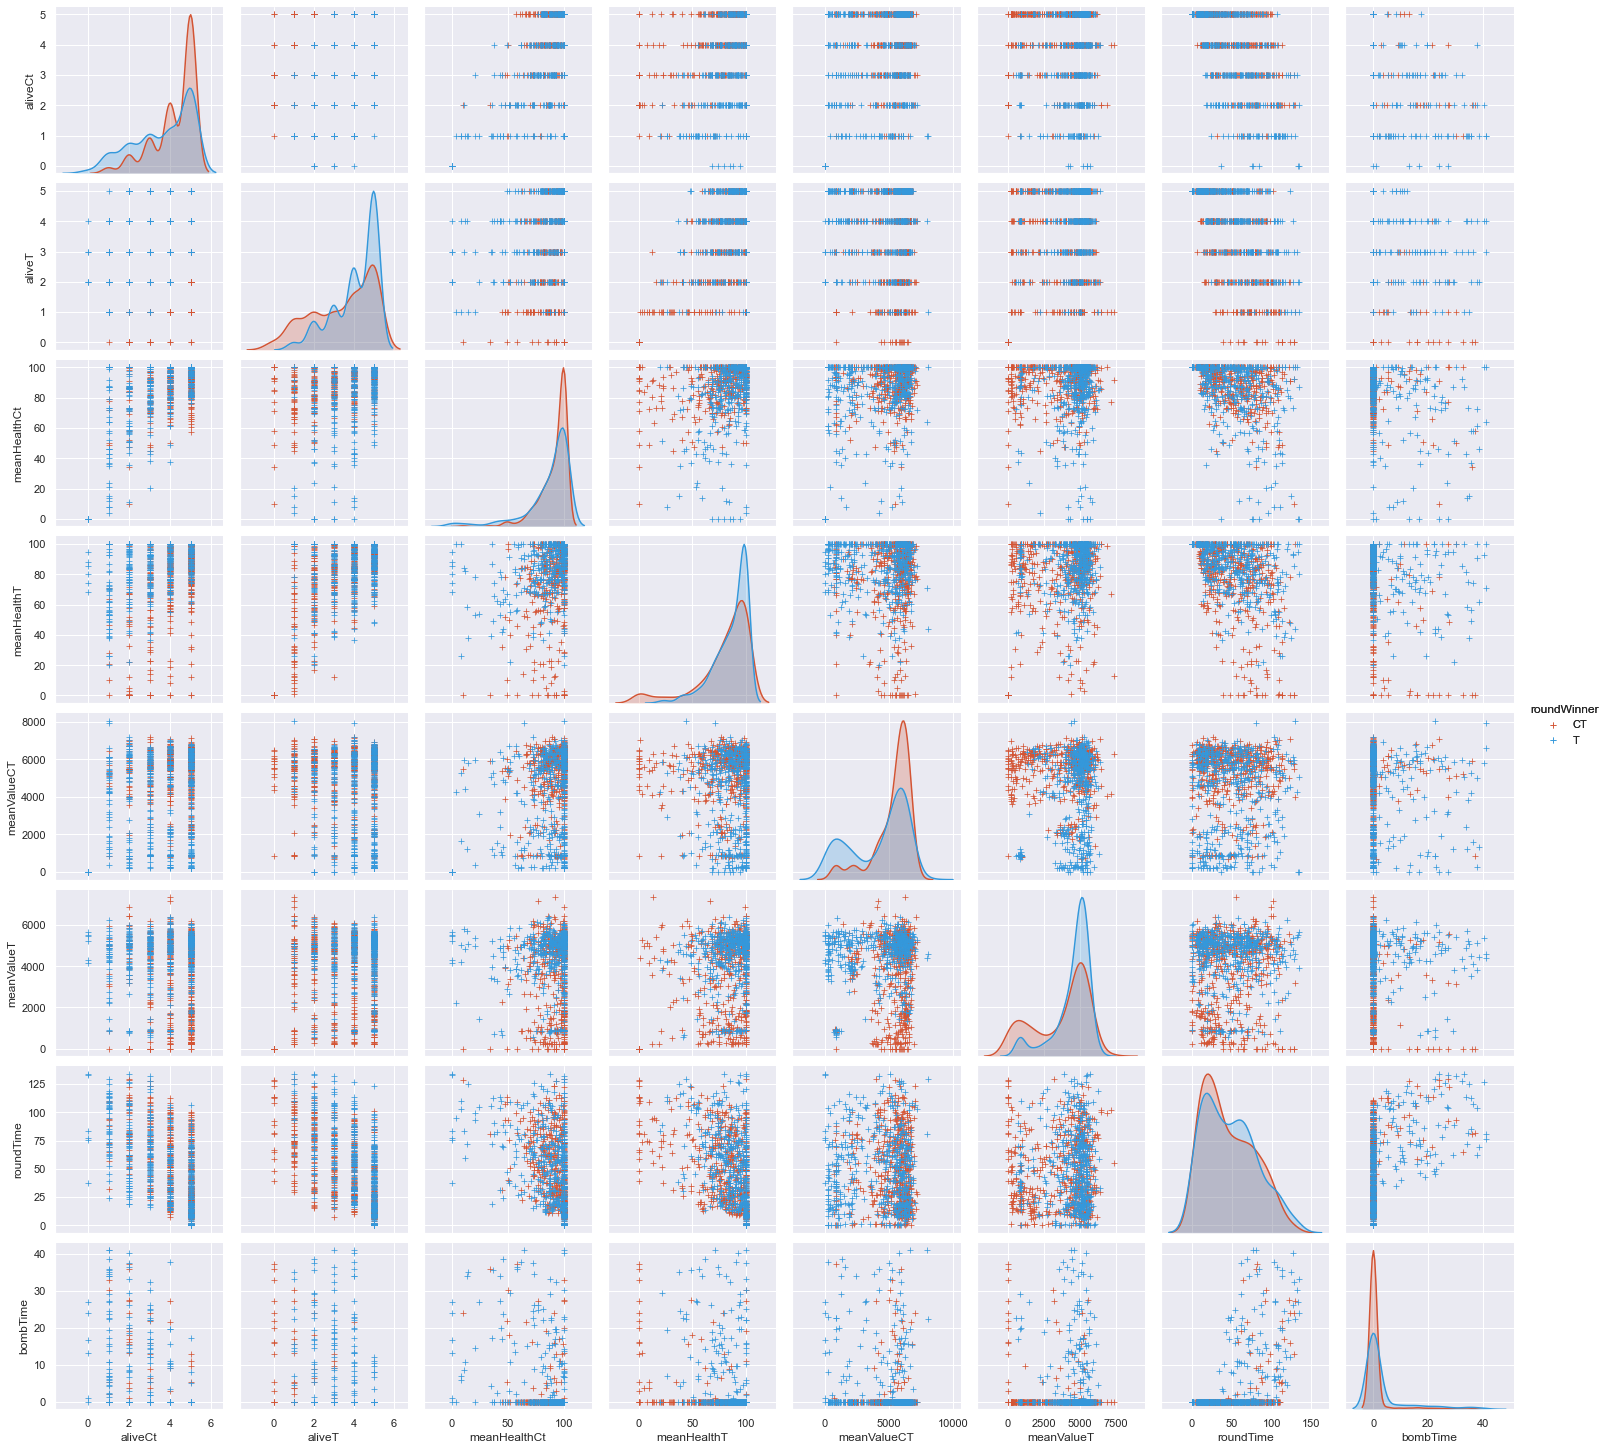

In [5]:
palette = sns.color_palette(['#d35434', '#3498db'])

g = sns.pairplot(
    all_df[[
        'roundWinner',
        'aliveCt',
        'aliveT',
        'meanHealthCt',
        'meanHealthT',
        'meanValueCT',
        'meanValueT',
        'roundTime',
        'bombTime'
    ]].sample(n=1000, random_state=1),
    hue='roundWinner',
    palette=palette,
    markers='+'
)
g = g.add_legend()
plt.show()

### Bomb Time Post-Plant

Since `bombTime` also represents whether or not the bomb is planted, it's worth plotting feature relationships and the general distribution of only non-zero `bombTime` values.

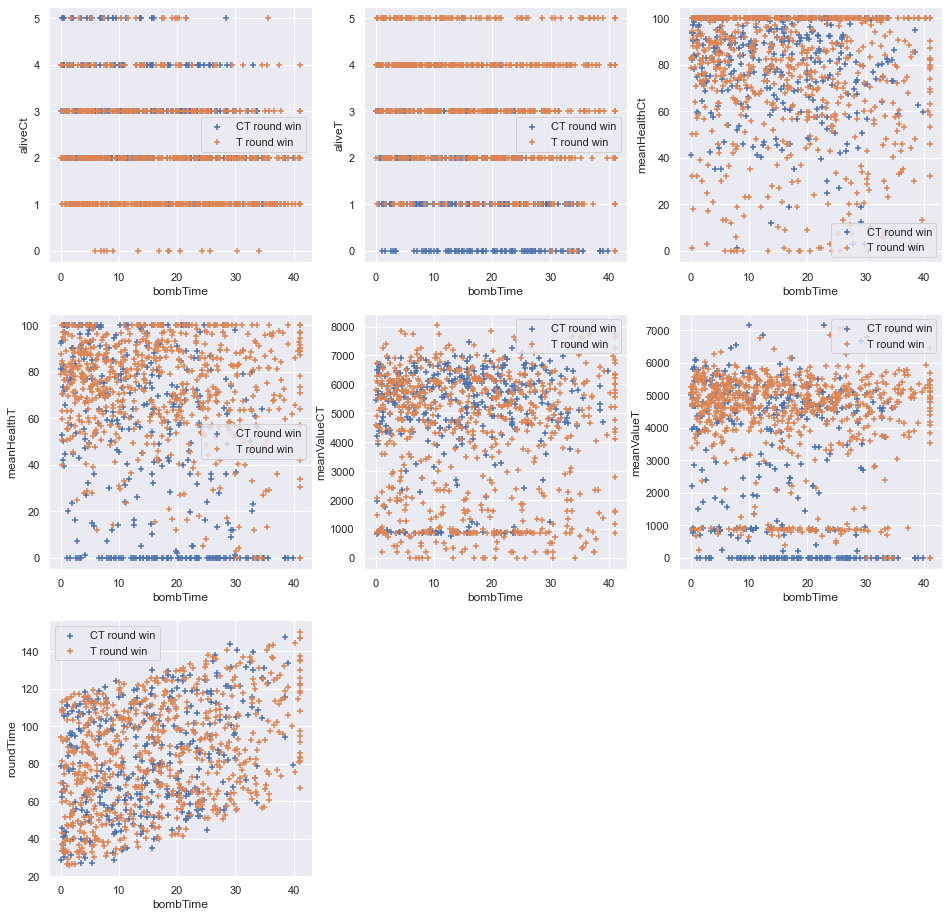

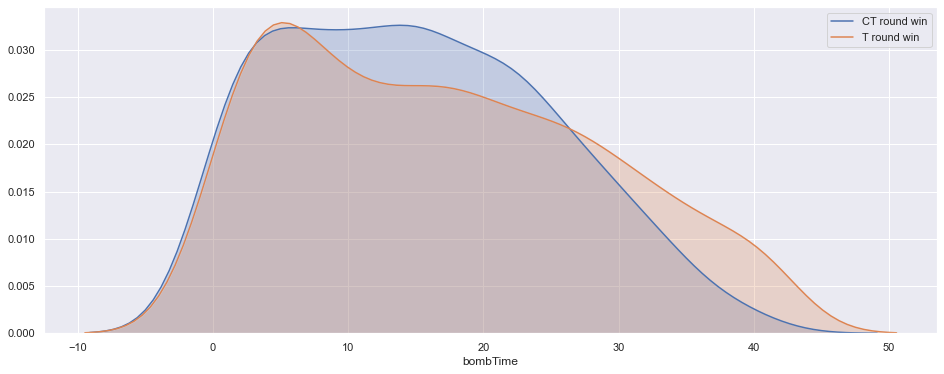

In [6]:
sample_df = all_df[all_df['bombTime'] > 0].sample(n=1000, random_state=1)

fig = plt.figure(figsize=(16,16))
for i, y in enumerate(['aliveCt','aliveT','meanHealthCt','meanHealthT','meanValueCT','meanValueT','roundTime']):
    ax = fig.add_subplot(3,3,i+1)
    ax.scatter(
        sample_df[sample_df['roundWinner'] == 'CT']['bombTime'],
        sample_df[sample_df['roundWinner'] == 'CT'][y],
        marker='+',
        label='CT round win'
    )
    ax.scatter(
        sample_df[sample_df['roundWinner'] == 'T']['bombTime'],
        sample_df[sample_df['roundWinner'] == 'T'][y],
        marker='+',
        label='T round win'
    )
    ax.set_xlabel('bombTime')
    ax.set_ylabel(y)
    ax.legend()
plt.show()

plt.figure(figsize=(16, 6))
g = sns.distplot(sample_df[sample_df['roundWinner'] == 'CT']['bombTime'], 
                 hist=False, label='CT round win', kde_kws={"shade": True})
g = sns.distplot(sample_df[sample_df['roundWinner'] == 'T']['bombTime'], 
                 hist=False, label='T round win', kde_kws={"shade": True})
plt.show()